# Investigating scales in visual analytics

This is a follow on from the HIV/AIDS project. Here I look at the impact of using different scales when plotting data from the mpox outbreak in 2022. There was quite a lot of interesting research in the area, following the Covid-19 pandemic. Koen Van den Eeckhout's article (https://koenvandeneeckhout.medium.com/data-visualization-in-a-time-of-pandemic-5c8c45d4b147) was a really useful stimulant in this work

**Work flow**
1. Gather and process global and local mpox data
2. Plot the outbreak on different scales (absolute, proportional and logarithmic) 
3. Use chloropleths to investigate the localisation of the outbreak in England (by NHS region)

**Findings**
* Our three scales show enable us to interepret the speread of the outbreak in different ways. Absolute numbers are often favoured during pandemics, but when comparing countries of simginicantly different sizes, wqe need some normalisation. In our first three plots, we are able to conclude that the mpox outbreak was worst in the US and Spain.
* As I worked through this project, it became clear how 'localised' this global outbreak was (cases in the US were mostly in New York City, similarly Barcelona for Spain). I wanted to investigate this further with the data that was most complete and easy to obtain (NHS England). We see that the outbreak was heavily concentrated in London. In our second chloropleth, we remove the London data so that we can better observe the dynamics of the spread across England, noting that we don't actually see mych dynamism.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import altair as alt

# The spread of mpox globally

In [19]:
# import data - tallies on the spread of monkeypox globally from WHO
df_ms=pd.read_csv("data/mp_Daily_Country_Wise_Confirmed_Cases.csv")

In [4]:
# Initital view
df_ms.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [20]:
# Fix the dataframe

# Swap rows and columns
df_ms=df_ms.T.reset_index()

# Set the first row as the column names
df_ms.columns = df_ms.iloc[0]
df_ms=df_ms.drop(0)

df_ms=df_ms.rename(columns={"Country":"Time"})
# to datetime
df_ms["Time"]=pd.to_datetime(df_ms.Time)
# and make index
df_ms=df_ms.set_index(df_ms["Time"])

df_ms.head()

,Time,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,...,Paraguay,South Sudan,El Salvador,Hong Kong,Egypt,Jordan,Guam,Ukraine,Bahrain,China
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-31,2022-01-31,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,2022-02-17,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,2022-02-28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,2022-03-04,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,2022-03-31,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# following some initial exploration we limit our analysis to the countries
# with the highest number of cases are:
high_list=['Portugal', 'Spain', 'United States','England']
# and their populations are:
high_pop=[10330000,47420000,331900000,55980000]
# for plotting
my_colours=["tab:blue","tab:orange","tab:green","tab:red"]

# and slide start along to bigger increases
df_ms=df_ms.loc['2022-05-15':'2022-09-16']

Text(0, 0.5, 'New cases')

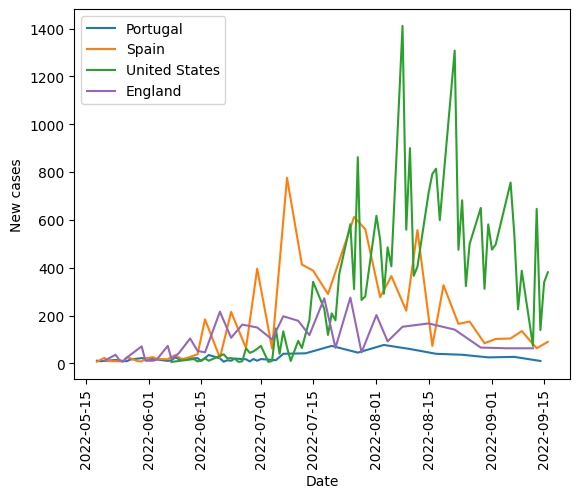

In [22]:
# Plot absolute values
my_colours=["tab:blue","tab:orange","tab:green","tab:purple"]
f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'
j=0
for i in high_list:
    df=df_ms[["Time",i]]
    df=df[df[i]>5] # Get rid of zeros and small values to smooth out a bit
    ax.plot(df.Time,df[i],label=i,linestyle="-",marker='None',color=my_colours[j])
    j+=1

ax.legend(facecolor="white")
ax.tick_params(axis='x', rotation=90)
plt.xlabel("Date")
plt.ylabel("New cases")

Text(0, 0.5, 'New cases per 10,000')

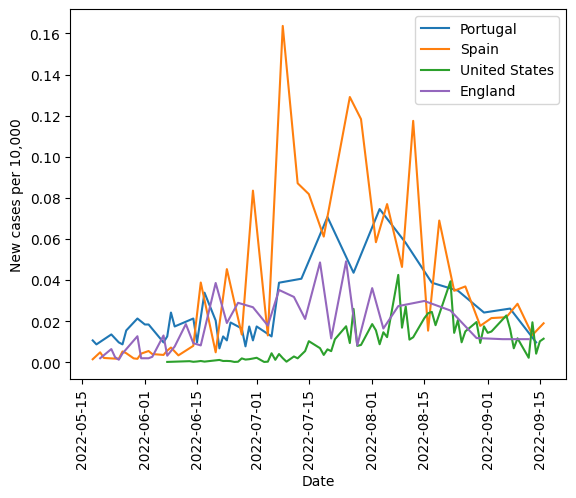

In [23]:
# scale to population (per 10000)
f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'
j=0
for i in high_list:
    df=df_ms[["Time",i]]
    df=df[df[i]>5]
    ax.plot(df.Time,df[i]*10000/high_pop[j],label=i,linestyle="-",marker='None',color=my_colours[j])
    j+=1

ax.legend(facecolor="white")
ax.tick_params(axis='x', rotation=90)
plt.xlabel("Date")
plt.ylabel("New cases per 10,000")

Text(0, 0.5, 'New cases - log10')

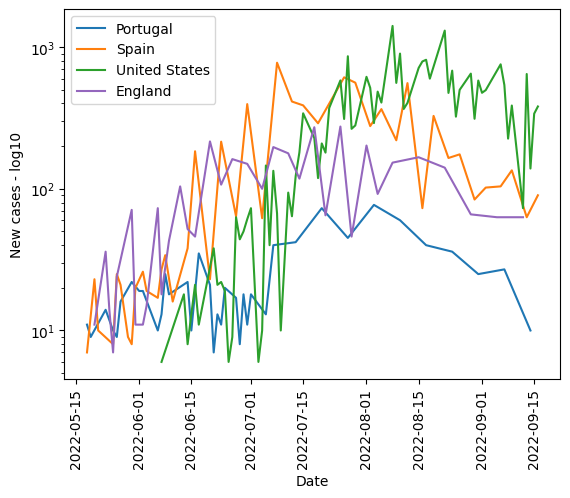

In [24]:
# logaritmic scale
my_colours=["tab:blue","tab:orange","tab:green","tab:purple"]
f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'
j=0
for i in high_list:
    df=df_ms[["Time",i]]
    df=df[df[i]>5]
    ax.plot(df.Time,df[i],label=i,linestyle="-",marker='None',color=my_colours[j])
    j+=1

ax.legend(facecolor="white")
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')

plt.xlabel("Date")
plt.ylabel("New cases - log10")



# How localised was the national outbreak?

In [82]:
# load data from UK gov
df_men=pd.read_csv("data/mp_eng.csv")

df_men.head()

,Specimen date,Region,Number of cumulative cases,Stage,Pop
0,13/05/2022,East of England,0,1,6345096
1,13/05/2022,East Midlands,0,1,4880094
2,13/05/2022,London,9,1,8796628
3,13/05/2022,North East,0,1,2646772
4,13/05/2022,North West,0,1,7422295


In [83]:
# get additional stats
# rate per 10,000
df_men['Rate']=df_men["Number of cumulative cases"]/df_men["Pop"]*10000

# get average rate by stage
df_stage=df_men.groupby("Stage").mean("Rate")
df_stage

,Number of cumulative cases,Pop,Rate
Stage,,,
1,1.000000,6281491.0,0.001137
2,61.333333,6281491.0,0.074151
3,220.000000,6281491.0,0.270658
4,342.222222,6281491.0,0.429816
5,377.666667,6281491.0,0.477240


In [ ]:
# add a residual column, calculated by stage
df_men["Res"] = 0
for index, row in df_men.iterrows():
    df_men.at[index, "Res"] = row["Rate"] - df_stage.loc[row["Stage"], "Rate"]

In [ ]:
# work on the regions to match with geo data
df_men.Region.unique()

array(['East of England', 'East Midlands', 'London', 'North East',
       'North West', 'South East', 'South West', 'West Midlands',
       'Yorkshire and Humber'], dtype=object)

In [86]:
# get geodata from https://geoportal.statistics.gov.uk/documents/ons::international-territorial-levels-1-and-2-january-2021-map-in-united-kingdom-1/explore
geo_data = gpd.read_file("data/NUTS1_Jan_2018_UGCB_in_the_UK_2022_-1274845379350881254.geojson")

geo_data.head()

,OBJECTID,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,GlobalID,geometry
0,1,UKC,North East (England),417313,600358,-1.72890,55.297031,628608f5-673c-45c8-9082-f57ed9604a20,"MULTIPOLYGON (((397942.931 657535.008, 400000...."
1,2,UKD,North West (England),350015,506280,-2.77237,54.449451,0413c215-94f7-4f2e-a0fd-37d517177413,"MULTIPOLYGON (((357136.203 587050.898, 356937...."
2,3,UKE,Yorkshire and The Humber,446903,448736,-1.28712,53.932640,d608863c-86bd-4877-b3b8-247794a0825a,"POLYGON ((479999.978 517670.160, 481340.496 51..."
3,4,UKF,East Midlands (England),477660,322635,-0.84967,52.795719,428c9691-f97b-4fa3-aef8-b3d8c0789cf9,"POLYGON ((516022.702 412210.895, 515854.099 41..."
4,5,UKG,West Midlands (England),386294,295477,-2.20358,52.556969,a8a5953c-6a23-4fca-b1c7-96d80a29dd95,"POLYGON ((409402.997 365710.796, 412633.099 36..."


In [87]:
# align regions with our df
geo_data.nuts118nm.unique()

array(['North East (England)', 'North West (England)',
       'Yorkshire and The Humber', 'East Midlands (England)',
       'West Midlands (England)', 'East of England', 'London',
       'South East (England)', 'South West (England)', 'Wales',
       'Scotland', 'Northern Ireland'], dtype=object)

In [88]:
geo_data.nuts118nm=geo_data.nuts118nm.replace({
       'North East (England)':"North East",
       'North West (England)':"North West",
       'Yorkshire and The Humber':"Yorkshire and Humber",
       'East Midlands (England)':'East Midlands',
       'West Midlands (England)':"West Midlands",
       'South East (England)':"South East",
       'South West (England)':"South West",
       'Wales':"Not Eng",
       'Scotland':"Not Eng",
       'Northern Ireland':"Not Eng"
       })

# remove non-english regions
geo_data=geo_data[geo_data.nuts118nm!="Not Eng"]

In [ ]:
# wrangling of geodata and residuals by stage and region...
for i in range(1,6):
    # get each stage
    stage_df=df_men[df_men["Stage"]==i]
    # simplify df
    stage_df=stage_df[["Region","Res"]]
    # rename Res column
    stage_df=stage_df.rename(columns={"Res":"Stage "+str(i)})
    # merge with geodata 
    geo_data=geo_data.merge(stage_df,left_on="nuts118nm",right_on="Region")
    geo_data=geo_data.drop(columns=['Region'])
    
geo_data.head()

,OBJECTID,nuts118cd,nuts118nm,bng_e,bng_n,long,lat,GlobalID,geometry,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5
0,1,UKC,North East,417313,600358,-1.72890,55.297031,628608f5-673c-45c8-9082-f57ed9604a20,"MULTIPOLYGON (((397942.931 657535.008, 400000....",-0.001137,-0.055260,-0.195095,-0.274910,-0.299665
1,2,UKD,North West,350015,506280,-2.77237,54.449451,0413c215-94f7-4f2e-a0fd-37d517177413,"MULTIPOLYGON (((357136.203 587050.898, 356937....",-0.001137,-0.044511,-0.122456,-0.175178,-0.186225
2,3,UKE,Yorkshire and Humber,446903,448736,-1.28712,53.932640,d608863c-86bd-4877-b3b8-247794a0825a,"POLYGON ((479999.978 517670.160, 481340.496 51...",-0.001137,-0.063205,-0.215928,-0.307585,-0.334941
3,4,UKF,East Midlands,477660,322635,-0.84967,52.795719,428c9691-f97b-4fa3-aef8-b3d8c0789cf9,"POLYGON ((516022.702 412210.895, 515854.099 41...",-0.001137,-0.061856,-0.223528,-0.341703,-0.356340
4,5,UKG,West Midlands,386294,295477,-2.20358,52.556969,a8a5953c-6a23-4fca-b1c7-96d80a29dd95,"POLYGON ((409402.997 365710.796, 412633.099 36...",-0.001137,-0.057356,-0.193403,-0.265228,-0.268985


In [ ]:
# Residual plot
res_list=["Stage 1","Stage 2","Stage 3","Stage 4","Stage 5"]

alt.Chart(geo_data).mark_geoshape().encode(
    color=alt.Color(alt.repeat(), type="quantitative",scale=alt.Scale(scheme='redblue',domain=[2,-2])),
).properties(
    projection={'type': 'identity','reflectY': True},
    width=80,
    height=200
).repeat(res_list,
    columns=6
)

alt.RepeatChart(...)

(-0.5, 687.5, 225.5, -0.5)

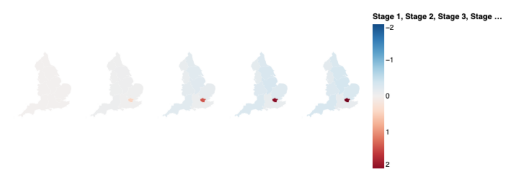

In [7]:
# plot might not appear - use png
plt.imshow(plt.imread("images/visualisation1.png"))
plt.axis('off')

In [ ]:
# Residual plot - no London
no_London=geo_data.drop(geo_data[geo_data.nuts118nm=="London"].index)

alt.Chart(no_London).mark_geoshape().encode(
    color=alt.Color(alt.repeat(), type="quantitative",scale=alt.Scale(scheme='redblue',domain=[0.4,-0.4])),
).properties(
    projection={'type': 'identity','reflectY': True},
    width=80,
    height=200
).repeat(res_list,
    columns=6
)

alt.RepeatChart(...)

(-0.5, 687.5, 225.5, -0.5)

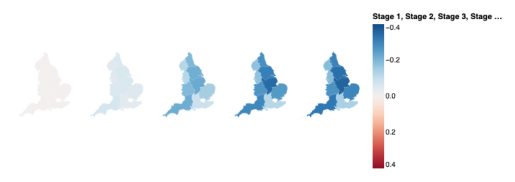

In [8]:
# plot might not appear - use png
plt.imshow(plt.imread("images/visualisation2.png"))
plt.axis('off')

One last time series, to show the spread by region

In [179]:
# With date detail instead of stage
df_dates=pd.read_csv("mp_eng_dates.csv")
df_dates=df_dates.rename(columns={"Number of cumulative cases":"Cases"})

In [180]:
# Pivot
df_dates=df_dates.pivot(values = 'Cases', index='Date', columns = 'Region').reset_index()

In [181]:
df_dates.head()

Region,Date,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and Humber
0,01/04/2022,0,0,1,0,0,0,0,0,0
1,01/05/2022,0,0,2,0,0,0,0,0,0
2,01/06/2022,4,9,229,3,11,17,2,4,1
3,01/07/2022,14,56,1117,15,79,99,22,29,19
4,01/08/2022,40,107,1980,31,158,246,64,86,56


In [182]:
df_dates.Date=pd.to_datetime(df_dates.Date, dayfirst=True)

Text(0, 0.5, 'Cumulative cases - log10')

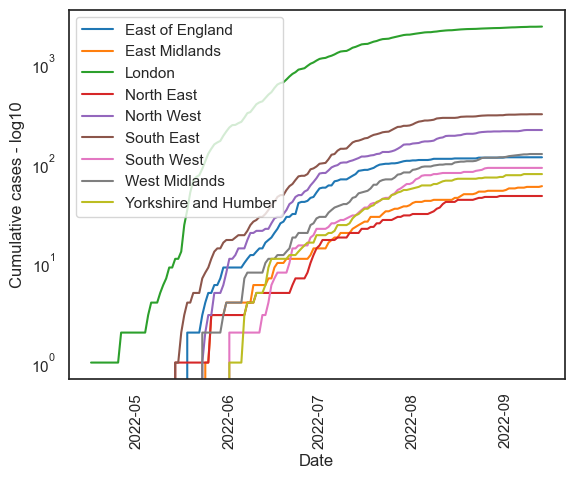

In [ ]:
# plot cumulative cases
df_dates=df_dates.sort_values(by=['Date'])

my_colours=["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive"]
f, ax = plt.subplots(1, 1)
x_col='date'
y_col = 'count'
j=0
for i in ['East of England', 'East Midlands', 'London', 'North East',
       'North West', 'South East', 'South West', 'West Midlands',
       'Yorkshire and Humber']:
    df=df_dates[["Date",i]]
    df=df[df.Date>"2022-04-15"]
    ax.plot(df.Date,df[i],label=i,linestyle="-",marker='None',color=my_colours[j])
    j+=1
 

ax.legend(facecolor="white")
ax.tick_params(axis='x', rotation=90)
ax.set_yscale('log')
plt.xlabel("Date")
plt.ylabel("Cumulative cases - log10")